# TMDB Movie Dataset EDA, Modeling, and Recommender System


In [1]:
# Disable warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import os

## 1. Data Loading and Gain Info


In [3]:
df_credits = pd.read_csv("Dataset/tmdb_5000_credits.csv")
df_movies = pd.read_csv("Dataset/tmdb_5000_movies.csv")

In [4]:
df_credits.head().T

,0,1,2,3,4
movie_id,19995,285,206647,49026,49529
title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df_movies.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [6]:
# Check for Joining Key
(df_credits.movie_id != df_movies.id).any().sum()
# 0 means we can join the two dataframes on movie_id

0

In [7]:
df = df_movies.merge(
    df_credits, left_on="id", right_on="movie_id", suffixes=("_movies", "_credits")
)
df.drop(["id"], axis=1, inplace=True)
df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [9]:
# Drop columns that are not useful
df.drop(["homepage", "status", "production_countries"], axis=1, inplace=True)

In [10]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates
df.duplicated().sum()

0

## 2. Data cleaning and Preprocessing


In [11]:
# Convert JSON columns to list
import json


def convert_json_to_list(df, columns):
    for column in columns:
        df[column] = df[column].apply(json.loads)
    return df


df = convert_json_to_list(
    df,
    ["genres", "keywords", "production_companies", "spoken_languages", "cast", "crew"],
)

df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
keywords,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'Walt Disney Pictures', 'id': 2}]"
release_date,2009-12-10,2007-05-19,2015-10-26,2012-07-16,2012-03-07
revenue,2787965087,961000000,880674609,1084939099,284139100


In [12]:
# Convert [{""id"": 12, ""name"": ""Adventure""}] to [Adventure]
def convert_json_to_list(df, columns, key="name", limit=5):
    """
    Convert JSON columns to list of values
    Just keep the first 5 values
    """
    for column in columns:
        if df[column][0] and key in df[column][0][0]:
            df[column] = df[column].apply(lambda x: [i[key] for i in x][:limit])
    return df


def director_and_producer(df):
    df["crew"] = df["crew"].apply(
        lambda x: [
            i["name"] for i in x if i["job"] == "Director" or i["job"] == "Producer"
        ]
    )
    return df


df = convert_json_to_list(
    df, ["genres", "keywords", "production_companies", "spoken_languages", "cast"]
)
df = director_and_producer(df)

In [13]:
df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[Action, Adventure, Fantasy, Science Fiction]","[Adventure, Fantasy, Action]","[Action, Adventure, Crime]","[Action, Crime, Drama, Thriller]","[Action, Adventure, Science Fiction]"
keywords,"[culture clash, future, space war, space colon...","[ocean, drug abuse, exotic island, east india ...","[spy, based on novel, secret agent, sequel, mi6]","[dc comics, crime fighter, terrorist, secret i...","[based on novel, mars, medallion, space travel..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[Ingenious Film Partners, Twentieth Century Fo...","[Walt Disney Pictures, Jerry Bruckheimer Films...","[Columbia Pictures, Danjaq, B24]","[Legendary Pictures, Warner Bros., DC Entertai...",[Walt Disney Pictures]
release_date,2009-12-10,2007-05-19,2015-10-26,2012-07-16,2012-03-07
revenue,2787965087,961000000,880674609,1084939099,284139100


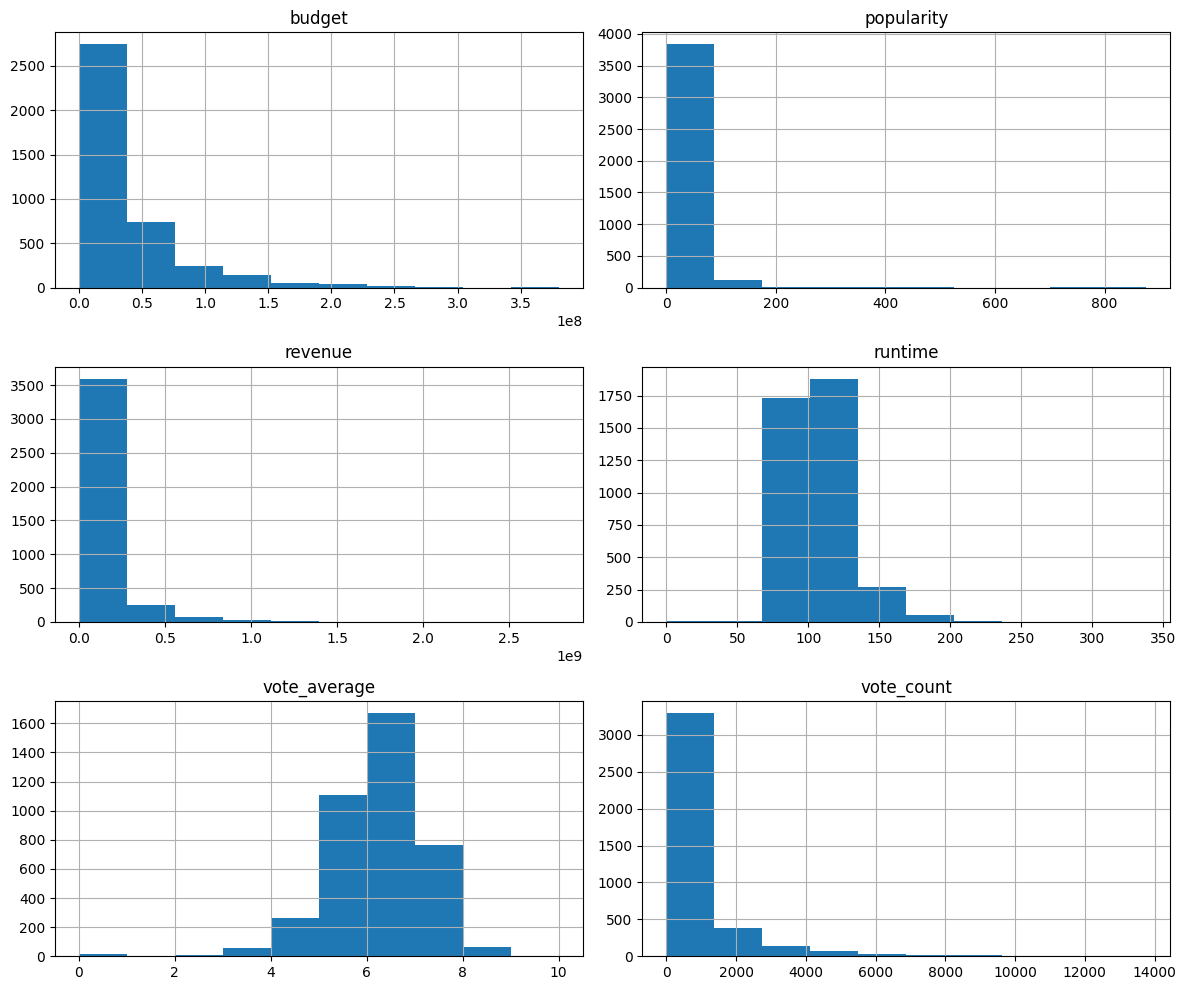

In [14]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.drop(
    "movie_id"
)
df[numerical_features].hist(figsize=(12, 10))

plt.tight_layout()
plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3959.0,3.344110e+07,4.252666e+07,0.000000,3.500000e+06,1.980000e+07,4.500000e+07,3.800000e+08
popularity,3959.0,2.469113e+01,3.386855e+01,0.000372,7.028132e+00,1.624507e+01,3.212488e+01,8.755813e+02
revenue,3959.0,9.690687e+07,1.738999e+08,0.000000,7.456755e+05,3.248341e+07,1.140364e+08,2.787965e+09
runtime,3959.0,1.080533e+02,2.068589e+01,0.000000,9.400000e+01,1.040000e+02,1.180000e+02,3.380000e+02
vote_average,3959.0,6.181940e+00,9.977335e-01,0.000000,5.600000e+00,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,3959.0,8.081046e+02,1.316075e+03,0.000000,9.700000e+01,3.280000e+02,9.080000e+02,1.375200e+04
movie_id,3959.0,5.003059e+04,8.100863e+04,5.000000,8.214000e+03,1.256900e+04,4.952250e+04,4.337150e+05


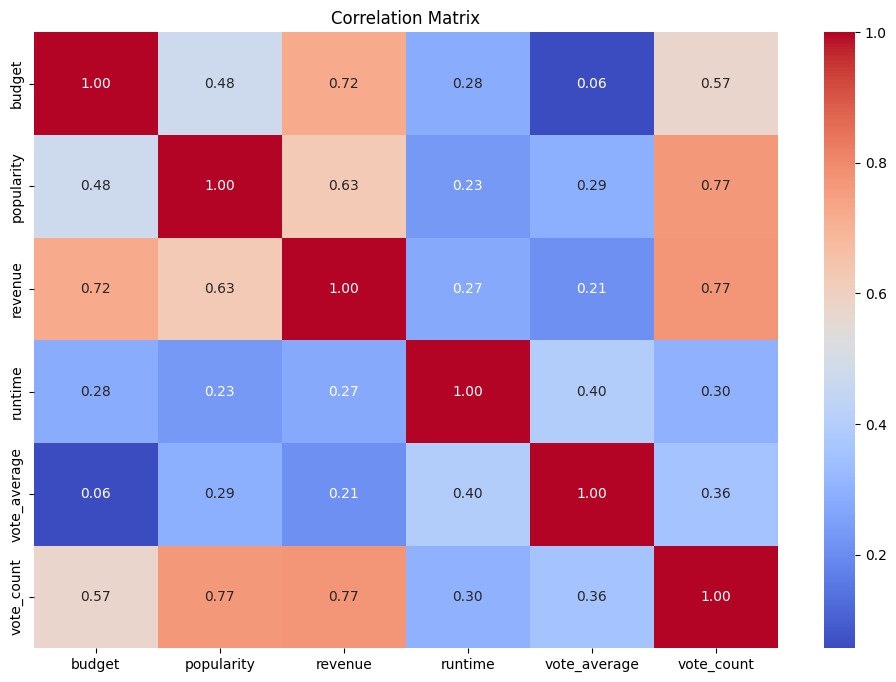

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
df

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,title_movies,vote_average,vote_count,movie_id,title_credits,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,"[English, Español]",Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[James Cameron, James Cameron, Jon Landau]"
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,961000000,169.0,[English],"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Eric McLeo..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, Barbara Broccoli, Michael G. Wilson]"
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,1084939099,165.0,[English],The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Christopher..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],2012-03-07,284139100,132.0,[English],"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Colin Wilson, Jim Morris, Lin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,[Drama],"[gang, audition, police fake, homeless, actress]",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[Asylum Films, FM Entertainment, Eagle Eye Fil...",1995-09-09,0,98.0,[English],Sometimes you've got to break the rules,Bang,6.0,1,124606,Bang,"[Darling Narita, Peter Greene, Michael Newland...","[Ash Baron-Cohen, Daniel M. Berger, Ladd Vance]"
4796,7000,"[Science Fiction, Drama, Thriller]","[distrust, garage, identity crisis, time trave...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,[Thinkfilm],2004-10-08,424760,77.0,[English],What happens if it actually works?,Primer,6.9,658,14337,Primer,"[Shane Carruth, David Sullivan, Casey Gooden, ...","[Shane Carruth, Shane Carruth]"
4798,220000,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],1992-09-04,2040920,81.0,[Español],"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Robert Rodriguez, Robert Rodriguez, Carlos Ga..."
4799,9000,"[Comedy, Romance]",[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,0,85.0,[],A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Die

## 4. Data Modeling (Using different ML models)


In [18]:
# Add feature 'profitable'
df["profitable"] = df["revenue"] > df["budget"]

# How many movies are profitable?
df["profitable"].value_counts()

profitable
True     2413
False    1546
Name: count, dtype: int64

In [24]:
# Feature selection
# Select numerical features
column_X = df.select_dtypes(include=["int64", "float64"]).drop(
    ["movie_id", "revenue"], axis=1
).columns
print(column_X)

# Feature selection


Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count'], dtype='object')


In [19]:
# Split the data into X and y
X = df[column_X]
y = df["profitable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
def analyze_model(model, X_train, y_train, X_test, y_test):
    # Start a timer
    start = time.time()
    print("\n", "=" * 50, sep="")
    print(model.__class__.__name__)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    roc_auc = round(roc_auc_score(y_test, y_pred_proba), 3)
    print("ROC AUC Score:", roc_auc)
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=model.__class__.__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(model.__class__.__name__ + " ROC Curve")
    plt.show()
    
    print("Run Time:", round(time.time() - start, 2), "s")
    print("=" * 50, "\n")

    return accuracy, precision, recall, f1, roc_auc



LogisticRegression
Accuracy: 0.775
Precision: 0.828
Recall: 0.794
F1 Score: 0.811
ROC AUC Score: 0.837


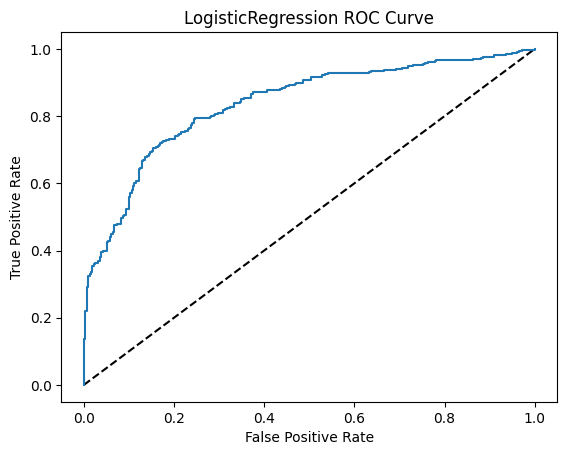

Run Time: 1.36 s


DecisionTreeClassifier
Accuracy: 0.707
Precision: 0.75
Recall: 0.775
F1 Score: 0.762
ROC AUC Score: 0.689


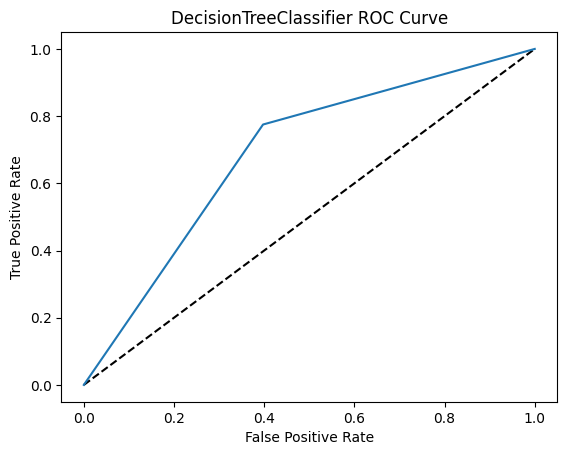

Run Time: 0.12 s


RandomForestClassifier
Accuracy: 0.749
Precision: 0.776
Recall: 0.823
F1 Score: 0.799
ROC AUC Score: 0.83


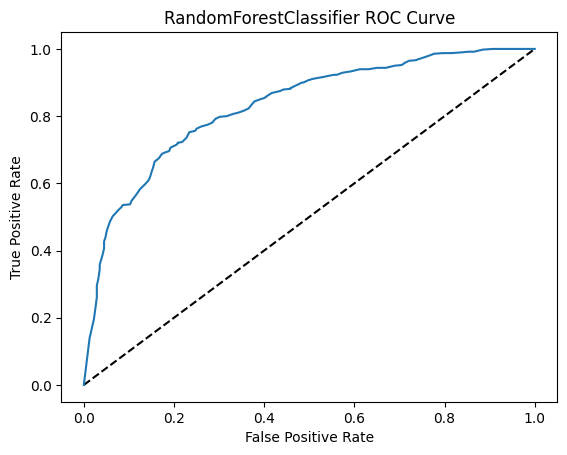

Run Time: 0.37 s


XGBClassifier
Accuracy: 0.75
Precision: 0.778
Recall: 0.823
F1 Score: 0.8
ROC AUC Score: 0.824


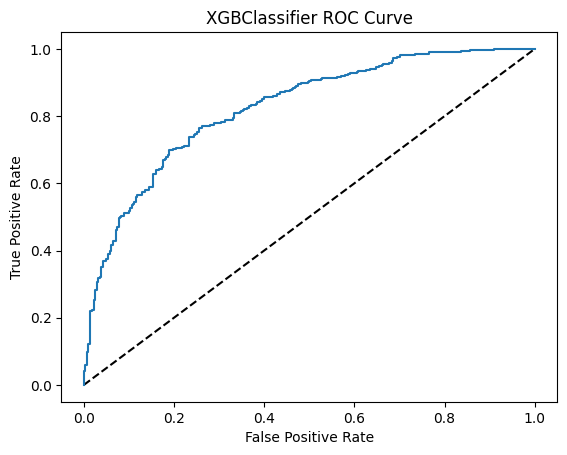

Run Time: 0.19 s


KNeighborsClassifier
Accuracy: 0.734
Precision: 0.766
Recall: 0.806
F1 Score: 0.786
ROC AUC Score: 0.775


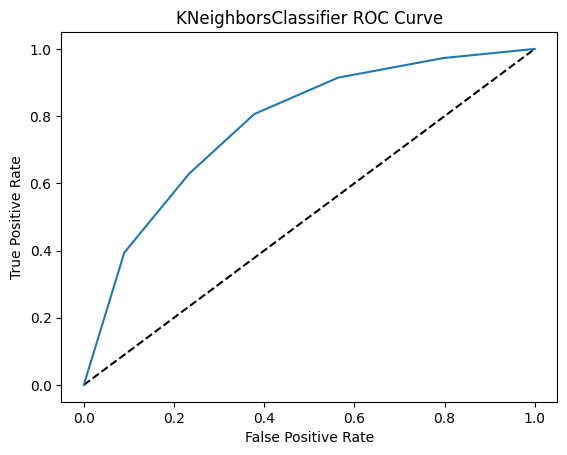

Run Time: 0.08 s


GradientBoostingClassifier
Accuracy: 0.783
Precision: 0.812
Recall: 0.835
F1 Score: 0.823
ROC AUC Score: 0.85


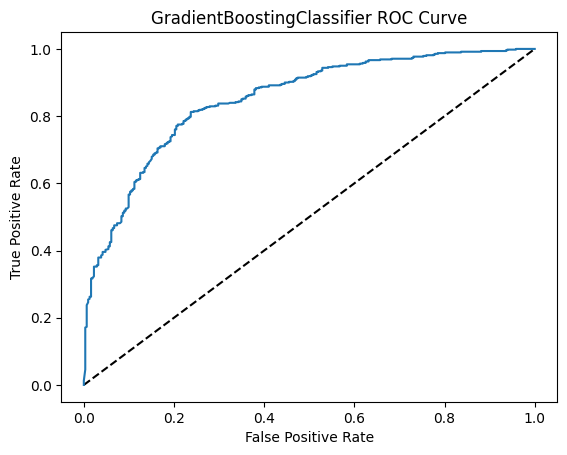

Run Time: 0.34 s


AdaBoostClassifier
Accuracy: 0.773
Precision: 0.795
Recall: 0.842
F1 Score: 0.818
ROC AUC Score: 0.839


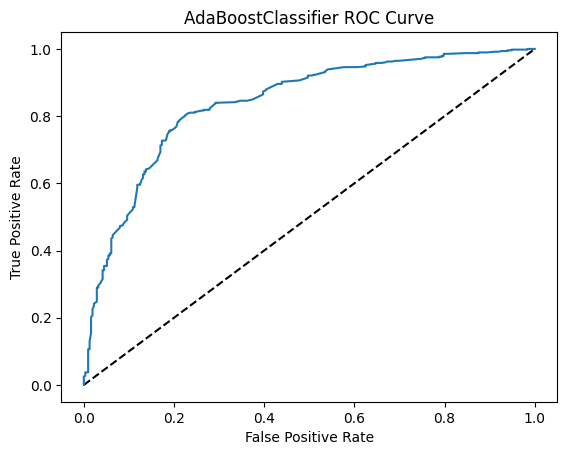

Run Time: 0.14 s


BaggingClassifier
Accuracy: 0.76
Precision: 0.807
Recall: 0.794
F1 Score: 0.8
ROC AUC Score: 0.812


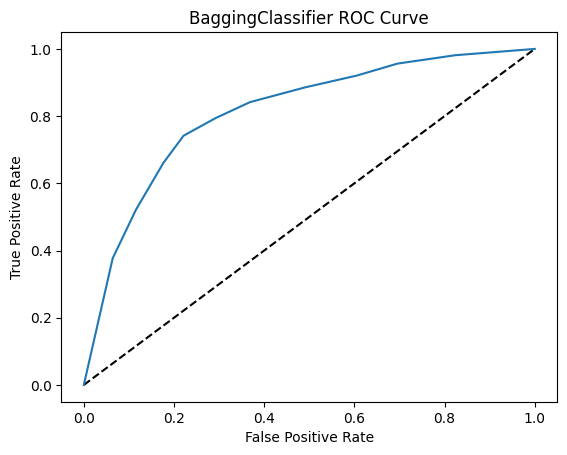

Run Time: 0.13 s


ExtraTreesClassifier
Accuracy: 0.758
Precision: 0.783
Recall: 0.829
F1 Score: 0.806
ROC AUC Score: 0.829


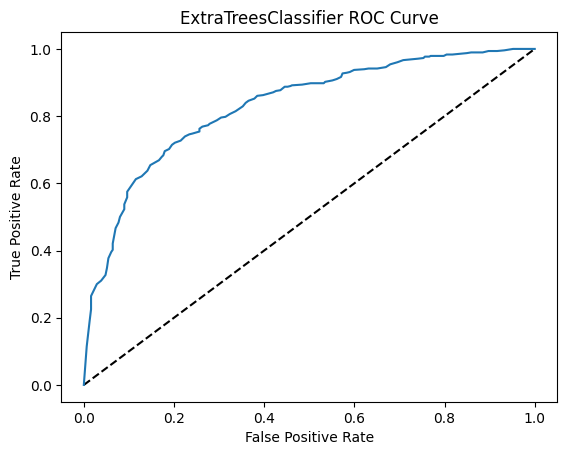

Run Time: 0.25 s



,Model,Accuracy,Precision,Recall,F1,ROC AUC
5,GradientBoostingClassifier,0.783,0.812,0.835,0.823,0.850
6,AdaBoostClassifier,0.773,0.795,0.842,0.818,0.839
0,LogisticRegression,0.775,0.828,0.794,0.811,0.837
2,RandomForestClassifier,0.749,0.776,0.823,0.799,0.830
8,ExtraTreesClassifier,0.758,0.783,0.829,0.806,0.829
3,XGBClassifier,0.750,0.778,0.823,0.800,0.824
7,BaggingClassifier,0.760,0.807,0.794,0.800,0.812
4,KNeighborsClassifier,0.734,0.766,0.806,0.786,0.775
1,DecisionTreeClassifier,0.707,0.750,0.775,0.762,0.689


In [22]:
# Test different models
# Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN, Gradient Boosting, AdaBoost, Bagging, Extra Trees
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
]
analyzes = []
for model in models:
    accuracy, precision, recall, f1, roc_auc = analyze_model(
        model, X_train, y_train, X_test, y_test
    )
    analyzes.append(
        {
            "Model": model.__class__.__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
        }
    )

# Print the results in a table
results = pd.DataFrame(analyzes).sort_values(by="ROC AUC", ascending=False)
results